# 2
Handwritten Digit Recognition. Use the digits.png file as templates for digits 0, 1, …, 9. Write
 a python program to cut out each digit as a labeled dataset from 0..9, each of which is 20x20. Note: You
 may also use this exact same dataset with 100 samples of each digit 0..9 using 20 x 20 pixels from the
 internet along with libraries to read/load the dataset, if that’s easier for you.
 Load all the character data into a python class. Then rescale each character from 20 x 20 to 24 x 24 using
 OpenCV. Use 80% of the data as the training set, reserving 20% for testing.
 

Load Image

In [1]:
import cv2
from typing import TypedDict, List, Tuple
import numpy as np

In [2]:
class Digits(TypedDict):
    zero: List[np.ndarray]
    one: List[np.ndarray]
    two: List[np.ndarray]
    three: List[np.ndarray]
    four: List[np.ndarray]
    five: List[np.ndarray]
    six: List[np.ndarray]
    seven: List[np.ndarray]
    eight: List[np.ndarray]
    nine: List[np.ndarray]


In [3]:
digits: Digits = {
    "zero": [],
    "one": [],
    "two": [],
    "three": [],
    "four": [],
    "five": [],
    "six": [],
    "seven": [],
    "eight": [],
    "nine": []
}

In [4]:
# subplot to see the result
import matplotlib.pyplot as plt
def crop_image(image: np.ndarray, shape: Tuple[int, int], digits: Digits):
  '''
  to crop a whole digit image(20*20) from big image and rescale it to 24*24
  '''
  height, width = shape
  print(image.shape)
  uncropClass: Digits = {}
  for i,key in enumerate(digits.keys()):
    print("crop from", 20*i*5 , "to", 20*(i+1)*5, "for", key)
    uncropClass[key] = image[20*i*5:20*(i+1)*5, :]    
    print(uncropClass[key].shape)

  for key in uncropClass.keys():
    class_crop = uncropClass[key]
    for i in range(0, class_crop.shape[1], width):
      for j in range(0, class_crop.shape[0], height):
        crop = class_crop[j:j+height, i:i+width]
        if crop.shape[0] == height and crop.shape[1] == width:
          digits[key].append(cv2.resize(crop, (24, 24)))


      

In [5]:
image = cv2.imread('./Q3/digits.png')
print(image.shape)

crop_image(image, (20, 20), digits)


digits['eight'][0].shape

(1000, 2000, 3)
(1000, 2000, 3)
crop from 0 to 100 for zero
(100, 2000, 3)
crop from 100 to 200 for one
(100, 2000, 3)
crop from 200 to 300 for two
(100, 2000, 3)
crop from 300 to 400 for three
(100, 2000, 3)
crop from 400 to 500 for four
(100, 2000, 3)
crop from 500 to 600 for five
(100, 2000, 3)
crop from 600 to 700 for six
(100, 2000, 3)
crop from 700 to 800 for seven
(100, 2000, 3)
crop from 800 to 900 for eight
(100, 2000, 3)
crop from 900 to 1000 for nine
(100, 2000, 3)


(24, 24, 3)

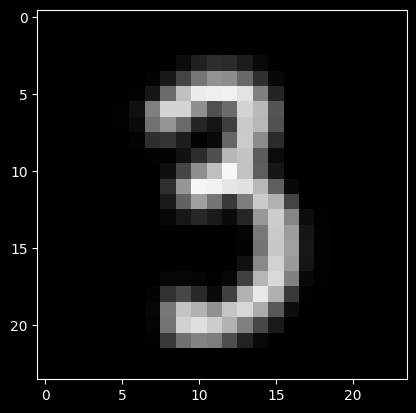

In [6]:

plt.imshow(digits['three'][50], cmap='gray')

In [7]:
from sklearn.model_selection import train_test_split

train_digits: Digits = {}
test_digits: Digits = {}

for key in digits.keys():
  train_digits[key], test_digits[key] = train_test_split(digits[key], test_size=0.2, random_state=42)

train_digits['eight'][0].shape

(24, 24, 3)

# 2.1
10+10+10+10 pts. 5 hrs. Then try recognition by using the test images and report the accuracy
 percent for these 4 (classifier, feature type) combinations: (KNN K = 5, gray scale features),
 (KNN K =5,HOGfeatures), (KNN K = 1, gray scale features), (KNN K = 1, HOG features). For
 HOG, use 20° histogram orientations of non-directional gradients (ie., 9 bins) with 16 x 16
 overlapping pixel windows for each 24 x 24 digit. Each digit will, thus, have 144 HOG features
 from 4 x 4 x 9, with 9 histogram values x 4 per 16 by 16 block x 4 such blocks per 24 x 24 image.


In [8]:
from typing import Callable

In [9]:
def preprocess_image(image: Digits, preprocess: Callable[[List[np.ndarray]], List[np.ndarray]]) -> Digits:
  '''
  to preprocess the image with a given function
  '''
  result: Digits = {}
  for key in image.keys():
    result[key] = preprocess(image[key])
  return result

1. KNN K = 5, gray scale features

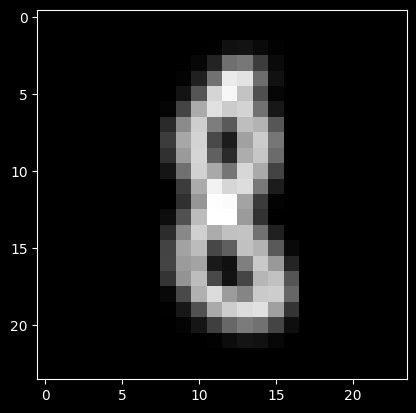

In [10]:
from PIL import Image

def to_grayscale(images: List[np.ndarray]) -> List[np.ndarray]:
  '''
  to convert the image to grayscale
  '''
  return [Image.fromarray(image).convert('L') for image in images]

grayscale_train_digits = preprocess_image(train_digits, to_grayscale)
grayscale_test_digits = preprocess_image(test_digits, to_grayscale)

plt.imshow(grayscale_train_digits['eight'][0], cmap='gray')

In [11]:
from sklearn.neighbors import KNeighborsClassifier

K = 5

def flatten_images(images: List[np.ndarray]) -> List[np.ndarray]:
  '''
  to flatten the image
  '''
  return [np.array(image).flatten() for image in images]

def train_knn_model(train_images: Digits, K: int) -> KNeighborsClassifier:
  '''
  to train the knn model
  '''
  train_images = preprocess_image(train_images, flatten_images)
  X = []
  y = []
  for key in train_images.keys():
    X += train_images[key]
    y += [key] * len(train_images[key])
  model = KNeighborsClassifier(n_neighbors=K)
  model.fit(X, y)
  return model

model = train_knn_model(grayscale_train_digits, K)


In [12]:
model.predict(flatten_images([grayscale_test_digits['eight'][0]]))

array(['eight'], dtype='<U5')

2. KNN K =5,HOGfeatures

In [13]:
from cv2 import HOGDescriptor

def HOG(images: List[np.ndarray]) -> List[np.ndarray]:
  '''
  to extract the HOG feature from the image
  '''
  winSize = (24,24) #same as the size of the image
  blockSize = (16,16) #OpenCV only supports 16 x 16 block sizes
  blockStride = (8,8) #multiple of cell size. Here it is multiple of 1.
  cellSize = (8,8) #OpenCV only supports 8x8 cell size. That means each Block will have 4 histograms
  nbins = 9 #OpenCV only supports 9 orientations per cell.  That means 1 block has 4 x 9 = 36 features
  derivAperture = 1
  winSigma = 4.
  histogramNormType = 0
  L2HysThreshold = 2.0000000000000001e-01
  gammaCorrection = 0
  hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                          histogramNormType,L2HysThreshold,gammaCorrection)
  
  result = []
  for image in images:
    result.append(hog.compute(np.array(image)))

  return result


def train_knn_model_HOG(train_images: Digits, K: int) -> KNeighborsClassifier:
  '''
  to train the knn model with HOG feature
  '''
  train_images = preprocess_image(train_images, HOG)
  X = []
  y = []
  for key in train_images.keys():
    X += train_images[key]
    y += [key] * len(train_images[key])
  model = KNeighborsClassifier(n_neighbors=K)
  model.fit(X, y)
  return model

model_HOG = train_knn_model_HOG(grayscale_train_digits, K)

model_HOG.predict(HOG([grayscale_test_digits['eight'][0]]))

c:\Users\USER\OneDrive\Documents\Python\MLforDS\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\OneDrive\Documents\Python\MLforDS\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array(['eight'], dtype='<U5')

3. KNN K = 1, gray scale features

In [14]:
K = 1

grayscale_train_digits = preprocess_image(train_digits, to_grayscale)
grayscale_test_digits = preprocess_image(test_digits, to_grayscale)

model_gray = train_knn_model(grayscale_train_digits, K)

model_gray.predict(flatten_images([grayscale_test_digits['nine'][5]]))

array(['nine'], dtype='<U5')

In [15]:
model_gray.predict(flatten_images([grayscale_test_digits['nine'][5]]))


array(['nine'], dtype='<U5')

4. KNN K = 1, HOG features with use 20° histogram orientations of non-directional gradients (ie., 9 bins) with 16 x 16
overlapping pixel windows for each 24 x 24 digit. Each digit will, thus, have 144 HOG features
from 4 x 4 x 9, with 9 histogram values x 4 per 16 by 16 block x 4 such blocks per 24 x 24 image.

In [16]:
def mod_HOG(images: List[np.ndarray]) -> List[np.ndarray]:
  '''
  to extract the HOG feature from the image
  '''
  winSize = (24,24)
  blockSize = (16,16)
  blockStride = (8,8)  # Overlapping of 50%
  cellSize = (8,8)
  nbins = 9  # Number of orientation bins
  hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
  hog_descriptors = []
  for image in images:
      # Ensure the image is a numpy array
      if not isinstance(image, np.ndarray):
          image = np.array(image)
      # Ensure the image is grayscale
      if len(image.shape) > 2:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      hog_descriptor = hog.compute(image)
      hog_descriptors.append(hog_descriptor)
  return hog_descriptors


model_HOG = train_knn_model_HOG(grayscale_train_digits, K)

model_HOG.predict(mod_HOG([grayscale_test_digits['eight'][0]]))

array(['eight'], dtype='<U5')

## 2.2
Use KNN K = 1 with HOG features to report:
1. 5 pts. 1.0 hrs. Result for 2 test images per digit 0..9 cropped out from digits.png but not
aligned at the original 20 x 20 image, so you may have smaller or bigger input image sizes.
You must rescale each test image to 24 x 24 because HOG requires this scaling.

the image from 0-9
<br>
<img src="./Q3/Q2_2_a_datadir.png"/>

In [20]:
import os
for imagename in os.listdir('./Q3/2_2_a/'):
  image = cv2.imread('./Q3/2_2_a/' + imagename)
  # rescue the image to 24*24
  resized_image = cv2.resize(image, (24, 24))
  # use the model to predict the image
  print("from image of ",imagename.split("_")[0], "got: ", model_HOG.predict(mod_HOG([resized_image])))

from image of  0 got:  ['zero']
from image of  0 got:  ['zero']
from image of  1 got:  ['one']
from image of  1 got:  ['four']
from image of  2 got:  ['two']
from image of  2 got:  ['two']
from image of  3 got:  ['three']
from image of  3 got:  ['three']
from image of  4 got:  ['four']
from image of  4 got:  ['four']
from image of  5 got:  ['five']
from image of  5 got:  ['five']
from image of  6 got:  ['six']
from image of  6 got:  ['five']
from image of  7 got:  ['seven']
from image of  7 got:  ['one']
from image of  8 got:  ['eight']
from image of  8 got:  ['eight']
from image of  9 got:  ['three']
from image of  9 got:  ['nine']


2. 5 pts. 1.0 hrs. Result for 2 test images per digit 0..9 you create in a Paint program to see if
you can find your character. Each test image should be big to start with such as 50x50, but
you should rescale it to 24 x 24 before testing.

I found the code that can [write image with tkinter](https://stackoverflow.com/questions/55575685/jupyter-notebook-let-a-user-inputs-a-drawing) and I need to implement it to use only image and not save to disk.

In [41]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import numpy as np

width = 200  # canvas width
height = 200 # canvas height
center = height//2
black = (255, 255, 255) # canvas back

# Create a dictionary to store the images for each digit
digit_images = {i: [] for i in range(10)}

def save():
    # Save the images and add them to the dictionary
    for i, output_image in enumerate([output_image1, output_image2]):
        resized_image = output_image.resize((24, 24))

        digit_images[digit.get()].append(np.array(resized_image))
        output_image.save(f"digit_{digit.get()}_{i}.png")
    # Clear the canvases
    canvas1.delete("all")
    canvas2.delete("all")

def paint(event: Event[Canvas], draw):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    event.widget.create_oval(x1, y1, x2, y2, fill="white",width=20)
    draw.line([x1, y1, x2, y2],fill="white",width=20)

master = Tk()

# Create a dropdown menu to select the digit
digit = IntVar(master)
digit.set(0) # default value
digit_menu = OptionMenu(master, digit, *range(10))
digit_menu.pack()

# Create two tkinter canvases to draw on
canvas1 = Canvas(master, width=width, height=height, bg='black')
canvas1.pack()
canvas2 = Canvas(master, width=width, height=height, bg='black')
canvas2.pack()

# Create two empty PIL images and draw objects to draw on
output_image1 = PIL.Image.new("RGB", (width, height), black)
draw1 = ImageDraw.Draw(output_image1)
output_image2 = PIL.Image.new("RGB", (width, height), black)
draw2 = ImageDraw.Draw(output_image2)

canvas1.bind("<B1-Motion>", lambda event: paint(event, draw1))
canvas2.bind("<B1-Motion>", lambda event: paint(event, draw2))

# Add a button to save the images
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [38]:
for i in range(10):
  print(f"Digit {i} has {len(digit_images[i])} images")

Digit 0 has 2 images
Digit 1 has 0 images
Digit 2 has 0 images
Digit 3 has 0 images
Digit 4 has 0 images
Digit 5 has 0 images
Digit 6 has 0 images
Digit 7 has 0 images
Digit 8 has 0 images
Digit 9 has 0 images


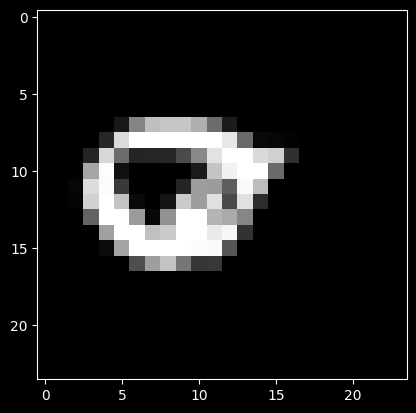

In [39]:
plt.imshow(digit_images[0][0], cmap='gray')

In [36]:
for i in digit_images.keys():
  for j in range(len(digit_images[i])):
    print("from image of ",i, "got: ", model_HOG.predict(mod_HOG([digit_images[i][j]])))

from image of  0 got:  ['eight']
from image of  0 got:  ['two']
from image of  1 got:  ['four']
from image of  1 got:  ['eight']
from image of  2 got:  ['four']
from image of  2 got:  ['nine']
from image of  3 got:  ['four']
from image of  3 got:  ['two']
from image of  4 got:  ['four']
from image of  4 got:  ['nine']
from image of  5 got:  ['four']
from image of  5 got:  ['four']
from image of  6 got:  ['four']
from image of  6 got:  ['four']
from image of  7 got:  ['four']
from image of  7 got:  ['four']
from image of  8 got:  ['four']
from image of  8 got:  ['nine']
from image of  9 got:  ['four']
from image of  9 got:  ['nine']


In [ ]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import numpy as np

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

# Create a dictionary to store the images for each digit
digit_images = {i: [] for i in range(10)}

def save():
    # Save the images and add them to the dictionary
    for i, output_image in enumerate([output_image1, output_image2]):
        resized_image = output_image.resize((24, 24))
        digit_images[digit.get()].append(np.array(resized_image))
        output_image.save(f"digit_{digit.get()}_{i}.png")
    # Clear the canvases
    canvas1.delete("all")
    canvas2.delete("all")

def paint(event, draw):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    event.widget.create_oval(x1, y1, x2, y2, fill="black",width=20)
    draw.line([x1, y1, x2, y2],fill="black",width=20)

master = Tk()

# Create a dropdown menu to select the digit
digit = IntVar(master)
digit.set(0) # default value
digit_menu = OptionMenu(master, digit, *range(10))
digit_menu.pack()

# Create two tkinter canvases to draw on
canvas1 = Canvas(master, width=width, height=height, bg='white')
canvas1.pack()
canvas2 = Canvas(master, width=width, height=height, bg='white')
canvas2.pack()

# Create two empty PIL images and draw objects to draw on
output_image1 = PIL.Image.new("RGB", (width, height), white)
draw1 = ImageDraw.Draw(output_image1)
output_image2 = PIL.Image.new("RGB", (width, height), white)
draw2 = ImageDraw.Draw(output_image2)

canvas1.bind("<B1-Motion>", lambda event: paint(event, draw1))
canvas2.bind("<B1-Motion>", lambda event: paint(event, draw2))

# Add a button to save the images
button=Button(text="save",command=save)
button.pack()

master.mainloop()